# **Load Dataset**

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **Q1 Identify Data Types of Each Attribute**

In [ ]:
df.dtypes.to_frame('Data Type')

,Data Type
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


# **Q3 Check for Missing & Inconsistent Values**

**1. Check Missing Values**

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


**2. Check for Zero Values in Important Medical Columns**

In [ ]:
(df[['chol', 'trestbps', 'thalach']] == 0).sum()

,0
chol,0
trestbps,0
thalach,0


**3. Check Range of Categorical Columns**

In [ ]:
print("cp unique values:", df['cp'].unique())
print("restecg unique values:", df['restecg'].unique())
print("slope unique values:", df['slope'].unique())
print("thal unique values:", df['thal'].unique())
print("ca unique values:", df['ca'].unique())

cp unique values: [0 1 2 3]
restecg unique values: [1 0 2]
slope unique values: [2 0 1]
thal unique values: [3 2 1 0]
ca unique values: [2 0 1 3 4]


**Q8 Detect duplicate records and explain how they should be handled.**

In [ ]:
print("Original Shape:", df.shape)

df = df.drop_duplicates()

print("New Shape After Removing Duplicates:", df.shape)


Original Shape: (1025, 14)
New Shape After Removing Duplicates: (302, 14)


**Q4 Outlier Detection (IQR Method)**

**Function to Detect Outliers**

--- Outlier Verification Results (IQR Method) ---

Attribute: chol
  Q1: 211.0, Q3: 274.75, IQR: 63.75
  Lower Bound: 115.375
  Upper Bound: 370.375
  Number of Outliers: 5
  Outlier Values: [417 564 409 394 407]

Attribute: trestbps
  Q1: 120.0, Q3: 140.0, IQR: 20.0
  Lower Bound: 90.0
  Upper Bound: 170.0
  Number of Outliers: 9
  Outlier Values: [180 178 174 180 192 200 172 180 178]

Attribute: thalach
  Q1: 133.25, Q3: 166.0, IQR: 32.75
  Lower Bound: 84.125
  Upper Bound: 215.125
  Number of Outliers: 1
  Outlier Values: [71]


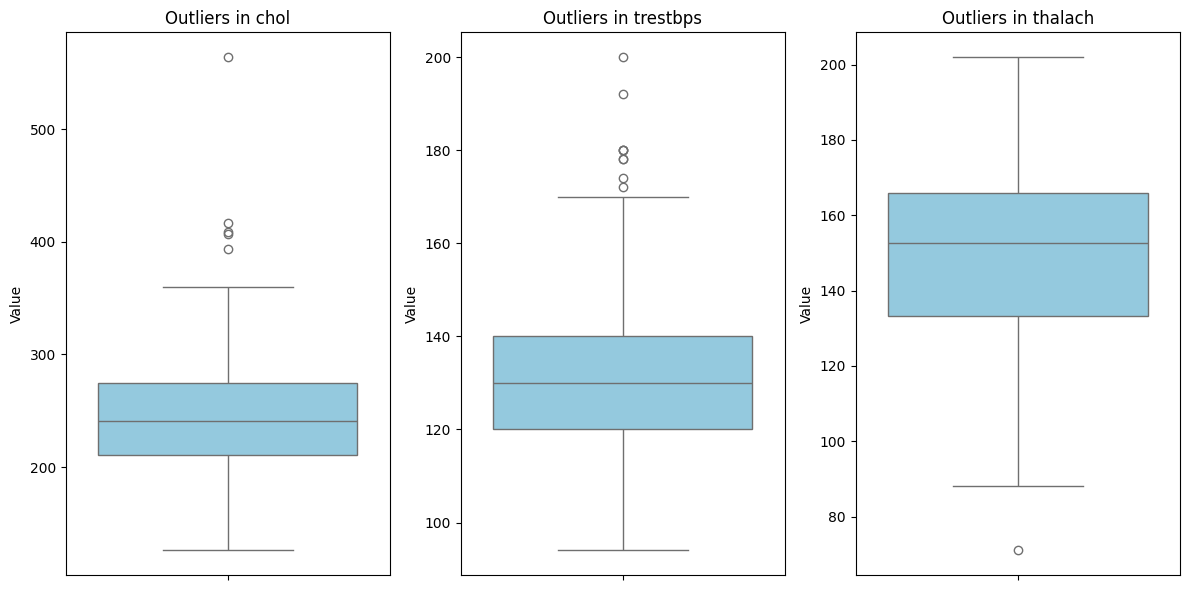

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_check = ['chol', 'trestbps', 'thalach']

print("--- Outlier Verification Results (IQR Method) ---")

for col in columns_to_check:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Print results for the report
    print(f"\nAttribute: {col}")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Number of Outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"  Outlier Values: {outliers[col].values}")

# 3. Visual Verification using Boxplots
plt.figure(figsize=(12, 6))

# Creating a subplot for each column
for i, col in enumerate(columns_to_check):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Outliers in {col}')
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

**Q9 Create a new feature called risk_score using relevant attributes.**

In [ ]:
df['risk_score'] = (
    df['chol'] +
    df['trestbps'] +
    df['oldpeak'] +
    df['ca']
)

# Display the first few rows to verify the new column
print("--- Data with New Feature 'risk_score' ---")
df[['chol', 'trestbps', 'oldpeak', 'ca', 'risk_score', 'target']].head()

--- Data with New Feature 'risk_score' ---


,chol,trestbps,oldpeak,ca,risk_score,target
0,212,125,1.0,2,340.0,0
1,203,140,3.1,0,346.1,0
2,174,145,2.6,0,321.6,0
3,203,148,0.0,1,352.0,0
4,294,138,1.9,3,436.9,0


**Q10 Categorize patients into age groups (Young, Middle-aged, Senior).**

In [ ]:
# Create age groups
def categorize_age(age):
    if age < 40:
        return "Young"
    elif 40 <= age <= 60:
        return "Middle-aged"
    else:
        return "Senior"

df['age_group'] = df['age'].apply(categorize_age)

# Check result
df[['age', 'age_group']].head()


,age,age_group
0,52,Middle-aged
1,53,Middle-aged
2,70,Senior
3,61,Senior
4,62,Senior


**Q11. Identify Highly Correlated Features Using Correlation Matrixt**

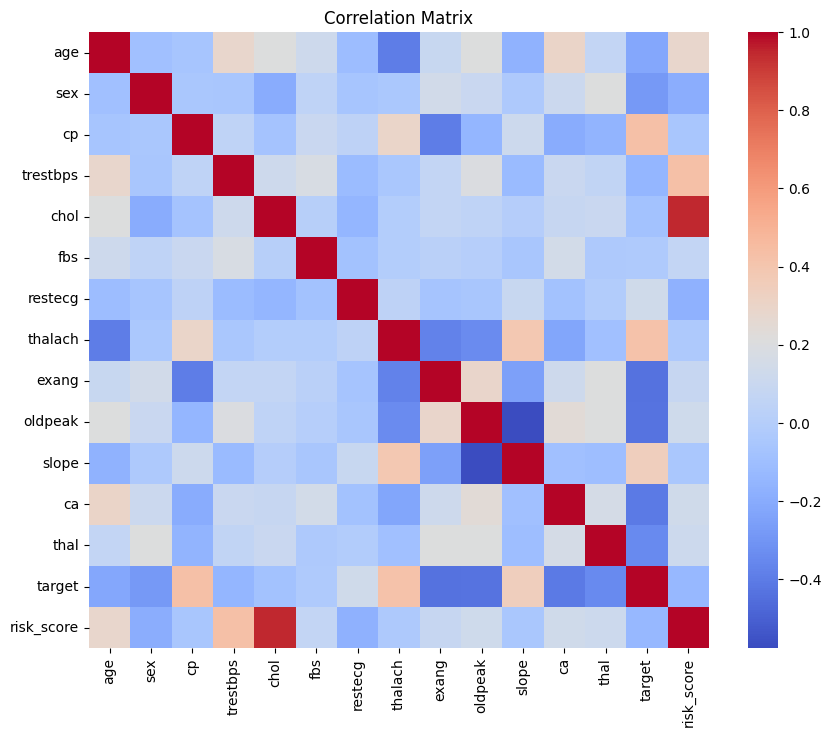

Highly Correlated Feature Pairs (|correlation| > 0.7):

risk_score and chol : 0.95


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Select only numerical columns
corr_matrix = df.corr(numeric_only=True)

# 2. Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# 3. Identify highly correlated feature pairs (threshold = 0.7)
print("Highly Correlated Feature Pairs (|correlation| > 0.7):\n")

found = False

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            print(f"{corr_matrix.columns[i]} and {corr_matrix.columns[j]} : {corr_value:.2f}")
            found = True

if not found:
    print("No highly correlated feature pairs found.")


**Q5 Convert categorical variables (cp, restecg, slope, thal) into suitable numerical representations.**

In [ ]:
import pandas as pd

categorical_cols = ['cp', 'restecg', 'slope', 'thal']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,52,1,125,212,0,168,0,1.0,2,0,...,False,False,False,True,False,False,True,False,False,True
1,53,1,140,203,1,155,1,3.1,0,0,...,False,False,False,False,False,False,False,False,False,True
2,70,1,145,174,0,125,1,2.6,0,0,...,False,False,False,True,False,False,False,False,False,True
3,61,1,148,203,0,161,0,0.0,1,0,...,False,False,False,True,False,False,True,False,False,True
4,62,0,138,294,1,106,0,1.9,3,0,...,False,False,False,True,False,True,False,False,True,False


 **Q6 Encoding the binary variables (sex, fbs, exang, target)**

In [ ]:
binary_cols = ['sex', 'fbs', 'exang', 'target']

for col in binary_cols:
    print(f"{col} unique values:", df[col].unique())


sex unique values: [1 0]
fbs unique values: [0 1]
exang unique values: [0 1]
target unique values: [0 1]


**Q12 Split the dataset into training and testing sets.**

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (241, 21)
Testing set shape: (61, 21)


**Q7 Normalize or standardize continuous features and justify the method used**

In [ ]:
from sklearn.preprocessing import StandardScaler

continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

scaler = StandardScaler()

df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

df.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0,0.806035,0,-0.037124,1.274980,0,...,False,False,False,True,False,False,True,False,False,True
1,-0.157260,1,0.478910,-0.841918,1,0.237495,1,1.773958,-0.714911,0,...,False,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,0,-1.074521,1,1.342748,-0.714911,0,...,False,False,False,True,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0,0.499898,0,-0.899544,0.280034,0,...,False,False,False,True,False,False,True,False,False,True
4,0.839089,0,0.364848,0.919336,1,-1.905464,0,0.739054,2.269926,0,...,False,False,False,True,False,True,False,False,True,False


# **📊 B. Exploratory Data Analysis (EDA) (Q13–Q25)**

**Q13 Analyze the distribution of age among patients.**

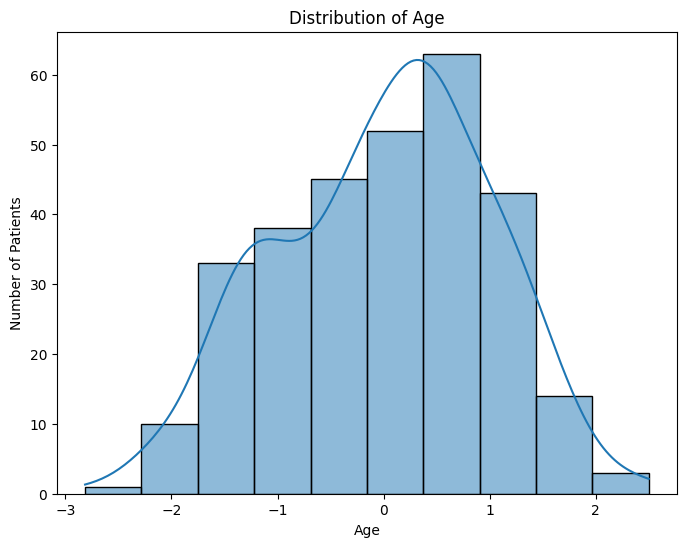

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=10, kde=True)

plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()


**Q14 Compare heart disease occurrence across gender.**

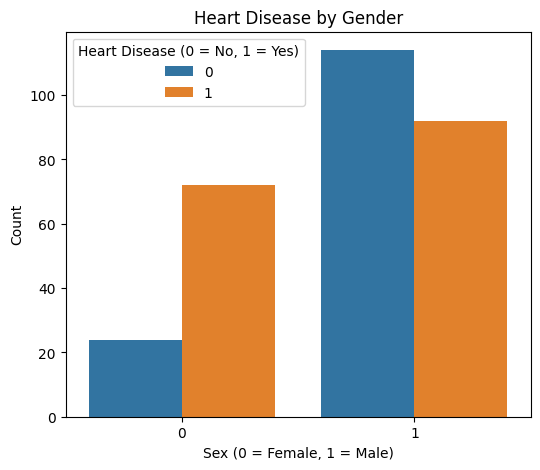

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='sex', hue='target', data=df)

plt.title("Heart Disease by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease (0 = No, 1 = Yes)")
plt.show()


**Q15 Relationship Between Chest Pain Type (cp) and Target**

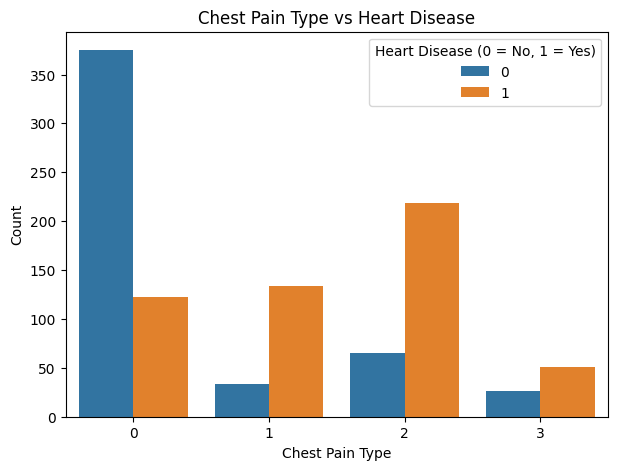

In [ ]:
df = pd.read_csv("heart.csv")
plt.figure(figsize=(7,5))
sns.countplot(x='cp', hue='target', data=df)

plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease (0 = No, 1 = Yes)")
plt.show()


Q16 Does Maximum Heart Rate (thalach) Differ Based on Heart Disease?**

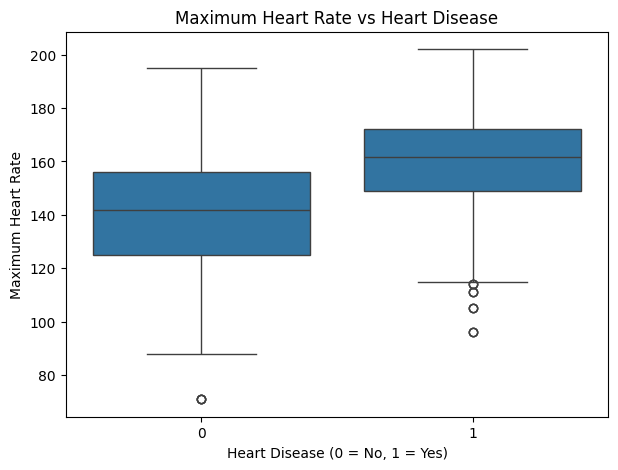

In [ ]:
#Since thalach is continuous, we use a boxplot.
plt.figure(figsize=(7,5))
sns.boxplot(x='target', y='thalach', data=df)

plt.title("Maximum Heart Rate vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Maximum Heart Rate")
plt.show()


**Q17 How Cholesterol (chol) Impacts Heart Disease**

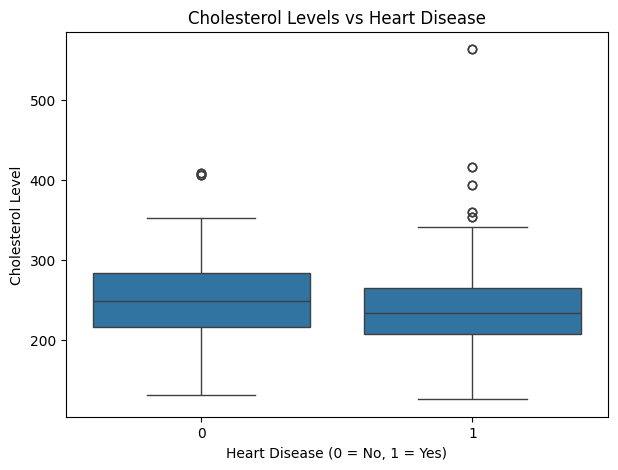

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='target', y='chol', data=df)

plt.title("Cholesterol Levels vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol Level")
plt.show()


**Q18 Compare Resting Blood Pressure (trestbps) Across Target Classes**

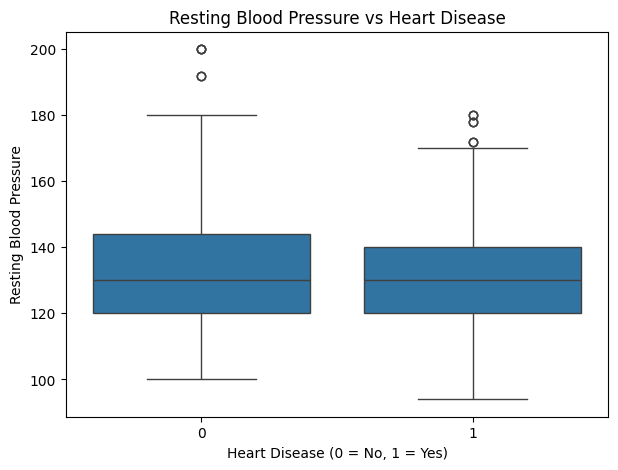

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='target', y='trestbps', data=df)

plt.title("Resting Blood Pressure vs Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Resting Blood Pressure")
plt.show()


**Q19 Effect of Exercise-Induced Angina (exang) on Heart Disease**

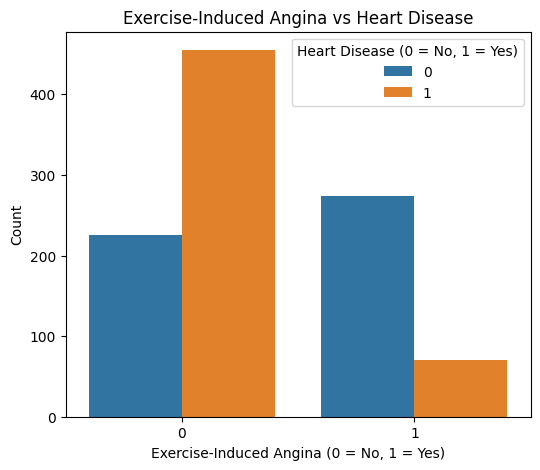

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='exang', hue='target', data=df)

plt.title("Exercise-Induced Angina vs Heart Disease")
plt.xlabel("Exercise-Induced Angina (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Heart Disease (0 = No, 1 = Yes)")
plt.show()


**Q20 Relationship Between oldpeak and slope**

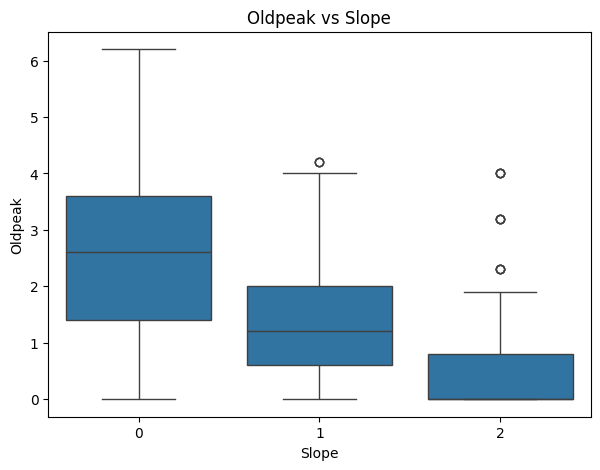

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='slope', y='oldpeak', data=df)

plt.title("Oldpeak vs Slope")
plt.xlabel("Slope")
plt.ylabel("Oldpeak")
plt.show()


**Q21 Major Vessels (ca) vs Heart Disease**

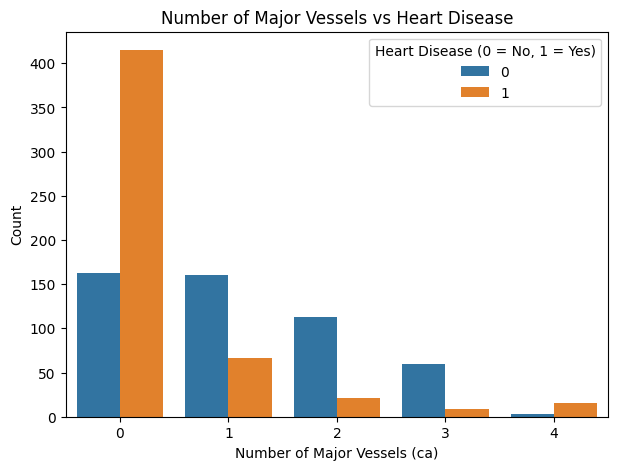

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='ca', hue='target', data=df)

plt.title("Number of Major Vessels vs Heart Disease")
plt.xlabel("Number of Major Vessels (ca)")
plt.ylabel("Count")
plt.legend(title="Heart Disease (0 = No, 1 = Yes)")
plt.show()


**Q22 Thalassemia (thal) and Heart Disease Risk**

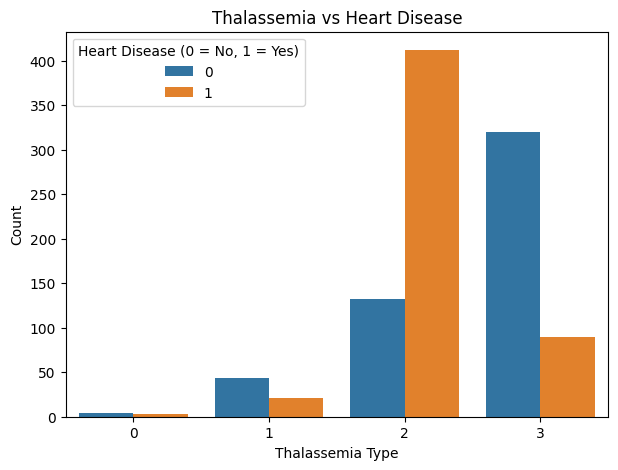

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='thal', hue='target', data=df)

plt.title("Thalassemia vs Heart Disease")
plt.xlabel("Thalassemia Type")
plt.ylabel("Count")
plt.legend(title="Heart Disease (0 = No, 1 = Yes)")
plt.show()


**Q23 Plot and Interpret the Correlation Heatmap**

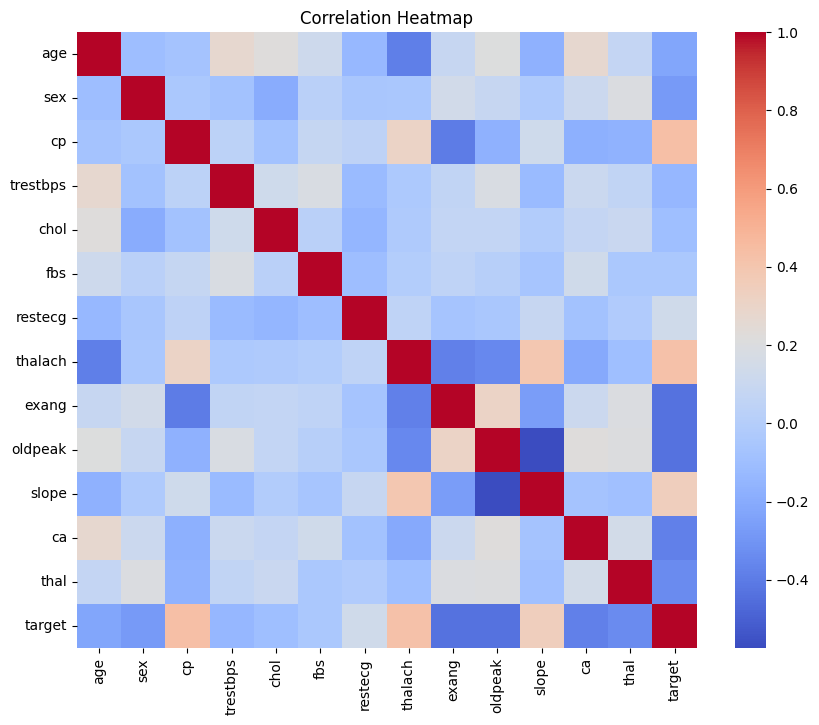

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Q24 Identify Top 3 Most Influential Features**

In [ ]:
# Get correlation with target
target_corr = corr_matrix['target'].drop('target')

# Sort by absolute correlation values
top_features = target_corr.abs().sort_values(ascending=False).head(3)

print("Top 3 Most Influential Features Affecting Target:\n")

for feature in top_features.index:
    print(f"{feature} : {target_corr[feature]:.2f}")


Top 3 Most Influential Features Affecting Target:

oldpeak : -0.44
exang : -0.44
cp : 0.43


**Q25 Summarize Key Insights for Cardiologist**

In [ ]:
print("\nKey Insights for Early Diagnosis:\n")

for feature in top_features.index:
    if target_corr[feature] > 0:
        print(f"- Higher {feature} is associated with increased heart disease risk.")
    else:
        print(f"- Higher {feature} is associated with lower heart disease occurrence (negative correlation).")

print("\nThese features can assist cardiologists in early identification of high-risk patients.")



Key Insights for Early Diagnosis:

- Higher oldpeak is associated with lower heart disease occurrence (negative correlation).
- Higher exang is associated with lower heart disease occurrence (negative correlation).
- Higher cp is associated with increased heart disease risk.

These features can assist cardiologists in early identification of high-risk patients.


# **Model Building**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop target only
X = df.drop('target', axis=1)
y = df['target']

# If age_group exists, remove it safely
if 'age_group' in X.columns:
    X = X.drop('age_group', axis=1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model building completed successfully.")


Model building completed successfully.


# **Model Testing**

In [ ]:
# Make predictions on test data
y_pred = model.predict(X_test)

print("Model testing completed.")



Model testing completed.


# **Model Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 79.51 %

Confusion Matrix:
[[73 29]
 [13 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

